# Problem Statement
"This dataset contains data for more than 9.5K cars sale in Ukraine. Most of them are used cars so it opens the possibility to analyze features related to car operation. This is a subset of all car data in Ukraine. Using this We will analyze the various parameters of used car sales in Ukraine."

# Introduction
This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis.

# Domain Knowledge
* Price: The selling price of the car, which depends on various factors like brand, model, mileage, engine type, and year of manufacturing

* Body Type: The structure of the car (e.g., sedan, hatchback, SUV, coupe, convertible, etc.), which affects market demand.

* Mileage: In the context of cars in Ukraine, "mileage" refers to the total distance a vehicle has traveled since it was new, typically measured in kilometers (km). and unit for this column is thousand kilometers (e.g. 68 = 68000KM)

* “Mileage” refers to the average distance or number of kilometers your car can go on a given quantity of fuel.

* Engine Volume (engV): The engine displacement in liters (L). Higher engine volume usually means higher power but lower fuel efficiency.

* Engine Type (engType): Fuel type of the engine:
Petrol (Gasoline) – Common, high availability, and moderate cost.
Diesel – Better mileage but higher maintenance and environmental concerns.
Hybrid – A mix of fuel and electric power, improving fuel efficiency.
Electric (EV) – Zero emissions and low running cost but higher initial price.
LPG (Liquefied Petroleum Gas) – Alternative fuel that is cheaper but less common.

* Registration: Whether the car has a valid registration.
Registered cars have legal clearance and are easier to sell.
Unregistered cars may require additional paperwork and legal checks.

* Year:The year the car was manufactured. Older cars tend to be cheaper due to depreciation.

* Model: The specific version of the car from the manufacturer.
 Some models hold value better due to reliability and brand reputation.
* Drive Type =
Full (All-Wheel Drive) = Power is delivered to all four wheels automatically, adjusting based on road conditions.
Rear (Rear-Wheel Drive) = Power is delivered to the rear wheels, while the front wheels handle steering.
Front (Front-Wheel Drive) = Power is delivered to the front wheels,

# TASKS TO DO
* 4.1 Which type of cars are sold maximum?
* 4.2 What is the co-relation between price and mileage?
* 4.3 How many cars are registered?
* 4.4 Price distribution between registered and non-registered cars.
* 4.5 What is the car price distribution based on Engine Value?
* 4.6 Which Engine Type of cars users preferred maximum?
* 4.7 Establish corelation between all features using heatmap?
* 4.8 Distribution of Price?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\admin\DataScienceCoures_2025\External_files\Car_Sales.xlsx")
df

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front


In [3]:
df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [4]:
df.tail()

,car,price,body,mileage,engV,engType,registration,year,model,drive
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


In [5]:
df.sample(5)

,car,price,body,mileage,engV,engType,registration,year,model,drive
5207,Chevrolet,6500.0,sedan,99,NaN,Petrol,yes,2007,Lacetti,front
6533,Honda,17500.0,sedan,57,2.0,Petrol,yes,2012,Accord,front
4916,Skoda,14900.0,sedan,108,1.9,Diesel,yes,2012,Octavia A5,front
6611,Mazda,8500.0,sedan,120,1.6,Gas,yes,2007,3,front
8127,Hafei,6100.0,sedan,91,1.6,Petrol,yes,2008,Saibao,front


In [6]:
df.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [8]:
df.nunique()

car               87
price           1353
body               6
mileage          442
engV             117
engType            4
registration       2
year              56
model            863
drive              3
dtype: int64

In [9]:
#to print only object col and its unique values
for i in df.columns:
    if df[i].dtypes == "object":
        print("Column Name:",i)
        print("Column Uniqie Values:",df[i].unique())
        print("-"*100)

Column Name: car
Column Uniqie Values: ['Ford' 'Mercedes-Benz' 'Nissan' 'Honda' 'Renault' 'BMW' 'Land Rover'
 'Volkswagen' 'Audi' 'Chrysler' 'Jaguar' 'Mitsubishi' 'Kia' 'Porsche'
 'Toyota' 'Hyundai' 'Opel' 'Chevrolet' 'Skoda' 'Daewoo' 'Mazda' 'Lexus'
 'Infiniti' 'Tesla' 'Subaru' 'VAZ' 'Alfa Romeo' 'Smart' 'Peugeot' 'Suzuki'
 'Chery' 'Bentley' 'Volvo' 'SsangYong' 'Fiat' 'ZAZ' 'Citroen' 'Dodge'
 'Jeep' 'Great Wall' 'Seat' 'MINI' 'Dacia' 'Hummer' 'Geely' 'Maserati'
 'BYD' 'Cadillac' 'Acura' 'Aston Martin' 'Rover' 'GAZ' 'GMC' 'Lincoln'
 '�UAZ' 'Moskvich-AZLK' 'FAW' 'UAZ' 'Rolls-Royce' 'TATA' 'ZX' 'Lifan'
 'Mercury' 'Groz' 'Moskvich-Izh' 'Saab' 'Lancia' 'Aro' 'Ferrari' 'Isuzu'
 'Bogdan' 'Dadi' 'Other-Retro' 'MG' 'Samand' 'JAC' 'Samsung' 'Lamborghini'
 'Daihatsu' 'Hafei' 'SMA' 'Fisker' 'Changan' 'Barkas' 'Huanghai'
 'Wartburg' 'Buick']
----------------------------------------------------------------------------------------------------
Column Name: body
Column Uniqie Values: ['crossover' 'sed

In [10]:
str_list = []
num_list = []
for i in df.columns:
    if df[i].dtypes == "object":
        str_list.append(i)
    else:
        num_list.append(i)
        
df1 = df[str_list]
df2 = df[num_list]

In [11]:
print(f"Object type DataFrame")
df1

Object type DataFrame


,car,body,engType,registration,model,drive
0,Ford,crossover,Gas,yes,Kuga,full
1,Mercedes-Benz,sedan,Gas,yes,E-Class,rear
2,Mercedes-Benz,other,Petrol,yes,CL 550,rear
3,Mercedes-Benz,van,Diesel,yes,B 180,front
4,Mercedes-Benz,vagon,Other,yes,E-Class,NaN
...,...,...,...,...,...,...
9571,Hyundai,crossover,Gas,yes,Tucson,front
9572,Volkswagen,vagon,Petrol,yes,Passat B2,front
9573,Mercedes-Benz,crossover,Petrol,yes,ML 350,full
9574,Lexus,sedan,Gas,yes,ES 350,front


In [12]:
print(f"Numrical type DataFrame")
df2

Numrical type DataFrame


,price,mileage,engV,year
0,15500.0,68,2.5,2010
1,20500.0,173,1.8,2011
2,35000.0,135,5.5,2008
3,17800.0,162,1.8,2012
4,33000.0,91,NaN,2013
...,...,...,...,...
9571,14500.0,140,2.0,2011
9572,2200.0,150,1.6,1986
9573,18500.0,180,3.5,2008
9574,16999.0,150,3.5,2008


In [13]:
df.duplicated().sum()  # check the duplicate rows

np.int64(113)

In [14]:
df[df.duplicated()].head(20)

,car,price,body,mileage,engV,engType,registration,year,model,drive
18,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
42,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
70,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
86,Toyota,103999.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
98,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
111,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
183,Toyota,195000.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
192,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
198,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
227,BMW,104999.0,crossover,2,3.0,Diesel,yes,2016,X5,full


In [15]:
df.drop_duplicates(keep="first",inplace=True,ignore_index=True)  # droping the duplicate rows

In [16]:
df

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
...,...,...,...,...,...,...,...,...,...,...
9458,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9459,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9460,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9461,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front


In [17]:
# cleaning the cars col   # removing the � from the car name
df["car"] = df.car.apply(lambda x:x.strip("�"))

In [18]:
# finding the null values
df.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           510
dtype: int64

In [19]:
round(((df.isnull().sum())/len(df)) * 100,2)

car             0.00
price           0.00
body            0.00
mileage         0.00
engV            4.59
engType         0.00
registration    0.00
year            0.00
model           0.00
drive           5.39
dtype: float64

In [20]:
df.engV.dtypes

dtype('float64')

In [21]:
df.drive.dtypes

dtype('O')

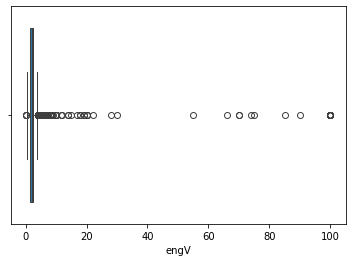

In [22]:
# shows the outliyers present or not
sns.boxplot(data=df,x="engV")
plt.show() 

In [23]:
df.engV.median()  # outilers is present hence we go with median to fill

np.float64(2.0)

In [24]:
df["engV"].fillna(value=df.engV.median())  # not appropriate method becuse col is have dependency with car and body

0       2.5
1       1.8
2       5.5
3       1.8
4       2.0
       ... 
9458    2.0
9459    1.6
9460    3.5
9461    3.5
9462    3.6
Name: engV, Length: 9463, dtype: float64

In [25]:
pd.set_option("display.max_row",None) # its helps the all df 

In [26]:
df.groupby(["car","body"])["engV"].median()

car            body     
Acura          crossover     3.700
               sedan         3.200
Alfa Romeo     hatch         1.500
               sedan         2.200
               vagon         1.900
Aro            crossover     1.400
Aston Martin   other         6.000
               sedan         6.000
Audi           crossover     3.000
               hatch         1.600
               other         2.500
               sedan         2.500
               vagon         2.500
               van           1.900
BMW            crossover     3.000
               hatch         2.000
               other         3.000
               sedan         2.500
               vagon         2.000
BYD            crossover     2.400
               hatch         1.500
               sedan         1.550
Barkas         van             NaN
Bentley        crossover     6.000
               other         6.000
               sedan         6.000
Bogdan         sedan         1.600
Buick          sedan         3

In [27]:
df["engV"] = df.groupby(["car","body"])["engV"].transform(lambda x:x.fillna(x.median()))

C:\python setup\Anaconda3\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\python setup\Anaconda3\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\python setup\Anaconda3\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\python setup\Anaconda3\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\python setup\Anaconda3\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\python setup\Anaconda3\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  retur

In [28]:
df.groupby(["car","body"])["engV"].median()

car            body     
Acura          crossover     3.700
               sedan         3.200
Alfa Romeo     hatch         1.500
               sedan         2.200
               vagon         1.900
Aro            crossover     1.400
Aston Martin   other         6.000
               sedan         6.000
Audi           crossover     3.000
               hatch         1.600
               other         2.500
               sedan         2.500
               vagon         2.500
               van           1.900
BMW            crossover     3.000
               hatch         2.000
               other         3.000
               sedan         2.500
               vagon         2.000
BYD            crossover     2.400
               hatch         1.500
               sedan         1.550
Barkas         van             NaN
Bentley        crossover     6.000
               other         6.000
               sedan         6.000
Bogdan         sedan         1.600
Buick          sedan         3

In [29]:
df.isnull().sum()

car               0
price             0
body              0
mileage           0
engV              9
engType           0
registration      0
year              0
model             0
drive           510
dtype: int64

In [30]:
pd.reset_option("display.max_rows")  # it well reset pd.set_option("display.max_row",None) to regular

In [31]:
# replacing the null value of drive col
df.drive.dtypes

dtype('O')

In [32]:
df.drive.value_counts()

drive
front    5171
full     2422
rear     1360
Name: count, dtype: int64

In [33]:
df.drive.mode()

0    front
Name: drive, dtype: object

In [34]:
df.drive.fillna(value=df.drive.mode()[0])

0        full
1        rear
2        rear
3       front
4       front
        ...  
9458    front
9459    front
9460     full
9461    front
9462     full
Name: drive, Length: 9463, dtype: object

In [35]:
round(((df.isnull().sum())/len(df)) * 100,2)

car             0.00
price           0.00
body            0.00
mileage         0.00
engV            0.10
engType         0.00
registration    0.00
year            0.00
model           0.00
drive           5.39
dtype: float64

In [36]:
df.dropna(subset=["engV"],inplace=True,ignore_index=True)

In [37]:
round(((df.isnull().sum())/len(df)) * 100,2)

car             0.00
price           0.00
body            0.00
mileage         0.00
engV            0.00
engType         0.00
registration    0.00
year            0.00
model           0.00
drive           5.35
dtype: float64

In [38]:
df.head(15)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.000,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.000,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.000,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.000,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.000,vagon,91,2.3,Other,yes,2013,E-Class,NaN
5,Nissan,16600.000,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.000,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.000,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.000,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.000,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [39]:
df.model.unique()

array(['Kuga', 'E-Class', 'CL 550', 'B 180', 'X-Trail', 'Accord',
       'Megane', 'Qashqai', 316, 750, 'GLE-Class', 'M5', 'Range Rover',
       'X5', 'Leaf', 'Passat B6', 'A6', 'Sebring', 'XF',
       'Sprinter 324 ����.', '5 Series', 520, 'Outlander', 'Juke',
       'Galant', 'Sportage', 'Cayenne', 'Passat B5', 'Land Cruiser 200',
       'Q7', 'Outlander XL', 'Vito ����.', 'Camry', 'Panamera', 'Touareg',
       'T5 (Transporter) ����', 530, 'Accent', 'T5 (Transporter) ����.',
       'Land Cruiser Prado', 'Vectra C', 'GLS 350', 'X6', 'Q5', 318,
       'Lacetti', 'Superb', 'Range Rover Sport', 'Passat B7', 'Lancer X',
       'Range Rover Evoque', 'Lanos', 'Pajero Wagon', 'Octavia A5', 3, 6,
       'LX 570', 740, 'GS 300', 'S 350', 'A5', 'C-Class', 'Tucson',
       'Octavia A7', 'FX 37', 'GX', 'CL 55 AMG', 'IQ', 'Model S', 'A4',
       'Forester', 'Ceed', 'Polo', 2121, 'Civic', 'Aveo', 'Lancer',
       'Murano', 'Focus', 'Sorento', 'Astra G', 'Macan', 147, 'ML 500',
       'Fortwo', 'Du

In [40]:
df.describe()

,price,mileage,engV,year
count,9454.000000,9454.000000,9454.000000,9454.000000
mean,15253.822586,139.995452,2.608510,2006.529300
std,22874.367717,98.456249,5.831055,7.043737
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,129.000000,2.000000,2008.000000
75%,16500.000000,195.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [41]:
# removing or cleaning the 0 price
df[df["price"] == 0]

,car,price,body,mileage,engV,engType,registration,year,model,drive
19,Land Rover,0.0,crossover,0,4.4,Diesel,yes,2016,Range Rover,full
51,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
68,Toyota,0.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
86,Porsche,0.0,sedan,22,4.8,Petrol,yes,2014,Panamera,full
88,Audi,0.0,crossover,0,3.0,Diesel,yes,2015,Q7,full
...,...,...,...,...,...,...,...,...,...,...
8906,Toyota,0.0,hatch,76,1.0,Petrol,yes,2007,Aygo,front
8912,Mercedes-Benz,0.0,crossover,1,3.0,Petrol,yes,2016,GLE-Class,full
8922,Ford,0.0,other,1,5.0,Petrol,yes,2014,Mustang,rear
9322,Renault,0.0,vagon,137,1.9,Diesel,yes,2008,Kangoo ����.,front


In [42]:
np.where(df["price"] == 0)

(array([  19,   51,   68,   86,   88,   90,   93,   97,  100,  115,  118,
         119,  152,  154,  174,  181,  194,  197,  206,  231,  234,  239,
         254,  265,  278,  371,  476,  492,  494,  521,  533,  551,  577,
         621,  623,  635,  641,  695,  696,  701,  706,  731,  733,  825,
         832,  851,  872, 1003, 1076, 1088, 1094, 1110, 1221, 1266, 1279,
        1305, 1357, 1498, 1568, 1601, 1602, 1666, 1696, 1722, 1757, 1969,
        1982, 2032, 2037, 2038, 2070, 2104, 2120, 2123, 2191, 2272, 2290,
        2322, 2374, 2420, 2500, 2509, 2574, 2591, 2648, 2696, 2706, 2714,
        2749, 2786, 2997, 3016, 3084, 3097, 3099, 3160, 3175, 3227, 3281,
        3283, 3358, 3372, 3387, 3388, 3452, 3495, 3532, 3569, 3645, 3655,
        3669, 3742, 3755, 3822, 3905, 3907, 3917, 3977, 3978, 4047, 4068,
        4132, 4142, 4162, 4194, 4199, 4403, 4544, 4573, 4680, 4692, 4694,
        4698, 4702, 4720, 4722, 4777, 4800, 4817, 4876, 4902, 4909, 4977,
        4985, 5157, 5180, 5188, 5237, 

In [43]:
# df.drop(index = np.where(df["price"] == 0)[0])    #its not working properly

In [44]:
df[df.price == 0].index

Index([  19,   51,   68,   86,   88,   90,   93,   97,  100,  115,
       ...
       8516, 8566, 8604, 8665, 8746, 8906, 8912, 8922, 9322, 9350],
      dtype='int64', length=238)

In [45]:
df.drop(index = (df[df["price"] == 0].index),inplace=True)

In [46]:
df.describe()

,price,mileage,engV,year
count,9216.000000,9216.000000,9216.000000,9216.000000
mean,15647.747258,141.059353,2.593721,2006.465169
std,23034.449597,98.170523,5.814954,6.996339
min,259.350000,0.000000,0.100000,1953.000000
25%,5400.000000,73.000000,1.600000,2004.000000
50%,9500.000000,130.000000,2.000000,2008.000000
75%,16800.000000,196.000000,2.500000,2011.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [47]:
df[df["mileage"] == 0]  

,car,price,body,mileage,engV,engType,registration,year,model,drive
10,Nissan,20447.1540,crossover,0,1.2,Petrol,yes,2016,Qashqai,front
17,Mercedes-Benz,99999.0000,crossover,0,3.0,Petrol,yes,2016,GLE-Class,full
20,Nissan,26033.5530,crossover,0,1.6,Diesel,yes,2016,X-Trail,full
23,BMW,65099.0000,crossover,0,2.0,Diesel,yes,2016,X5,full
25,Mercedes-Benz,69999.0000,crossover,0,2.2,Diesel,yes,2016,GLE-Class,full
...,...,...,...,...,...,...,...,...,...,...
9115,Hyundai,12800.7750,hatch,0,1.4,Petrol,yes,2016,Solaris,front
9149,Subaru,37500.0000,crossover,0,2.0,Diesel,yes,2016,Forester,full
9262,Suzuki,15486.9000,hatch,0,1.2,Petrol,yes,2016,Swift,front
9362,Opel,20120.0000,sedan,0,1.6,Diesel,yes,2016,Astra J,front


In [48]:
df.isnull().sum()

car               0
price             0
body              0
mileage           0
engV              0
engType           0
registration      0
year              0
model             0
drive           488
dtype: int64

In [49]:
df.duplicated().sum()

np.int64(0)

In [50]:
df.describe()

,price,mileage,engV,year
count,9216.000000,9216.000000,9216.000000,9216.000000
mean,15647.747258,141.059353,2.593721,2006.465169
std,23034.449597,98.170523,5.814954,6.996339
min,259.350000,0.000000,0.100000,1953.000000
25%,5400.000000,73.000000,1.600000,2004.000000
50%,9500.000000,130.000000,2.000000,2008.000000
75%,16800.000000,196.000000,2.500000,2011.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [51]:
df

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,2.3,Other,yes,2013,E-Class,NaN
...,...,...,...,...,...,...,...,...,...,...
9449,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9450,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9451,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9452,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front


# TASKS TO DO

## 4.1 Which type of cars are sold maximum?

In [52]:
df["body"].unique()

array(['crossover', 'sedan', 'other', 'van', 'vagon', 'hatch'],
      dtype=object)

C:\Users\admin\AppData\Local\Temp/ipykernel_16692/2725933992.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="body",palette=["Blue","Black","orange","red","green","yellow"])


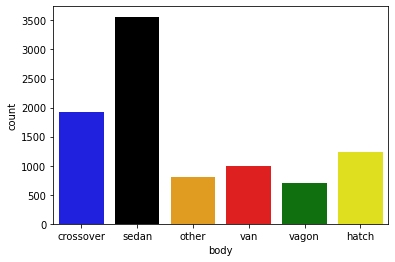

In [53]:
sns.countplot(data=df,x="body",palette=["Blue","Black","orange","red","green","yellow"])
plt.show()

## Insights
1. 35000 cars of sedan body type are sold.
2. upto 1900 cars of crossover body type are sold.
3. more than 1000 cars of hatch body type are sold.
4. upto 1000 vans are sold.
5. more than 500 cars of vagon body type are sold.

In [54]:
df.body.value_counts()

body
sedan        3564
crossover    1925
hatch        1231
van           996
other         803
vagon         697
Name: count, dtype: int64

##  4.2 What is the co-relation between price and mileage?

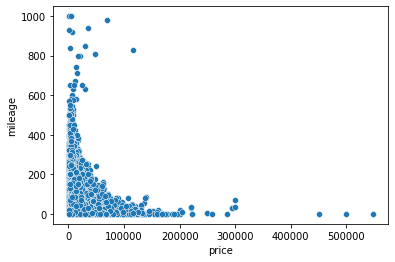

In [55]:
sns.scatterplot(data=df,x="price",y="mileage")  # not show what is properly which co-relation it is
plt.show()

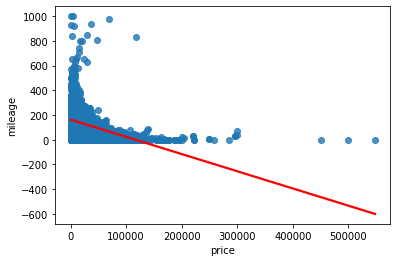

In [56]:
sns.regplot(data=df,x="price",y="mileage",ci=False, line_kws={"color":"red"})  # show properly is the negative co-relation
plt.show()

## Insights
1.If the milage decrease the the price of car is also decrease

## 4.3 How many cars are registered?

In [57]:
df.registration.value_counts()

registration
yes    8662
no      554
Name: count, dtype: int64

C:\Users\admin\AppData\Local\Temp/ipykernel_16692/143979171.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sns.countplot(data=df,x="registration",palette=["g","r"])


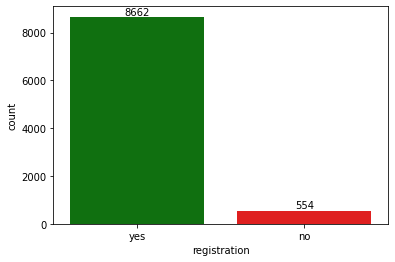

In [77]:
x=sns.countplot(data=df,x="registration",palette=["g","r"])
plt.bar_label(x.containers[0])
plt.bar_label(x.containers[1])
plt.show()

## Insights 
1. There are maximum number of cars are registered
2. There only 554 cars are not registered

## 4.4 Price distribution between registered and non-registered cars.

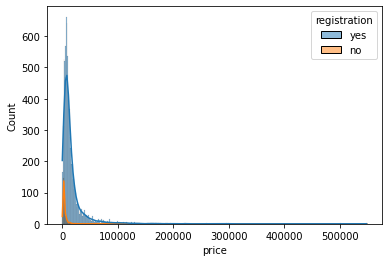

In [59]:
sns.histplot(data=df,x="price",hue="registration",kde=True)
plt.show()

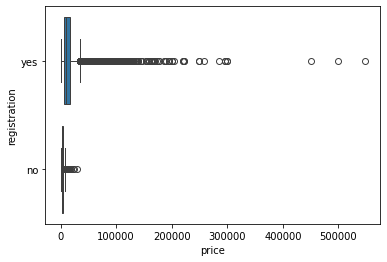

In [60]:
sns.boxplot(data=df,x="price",y="registration")
plt.show()

## 4.5 What is the car price distribution based on Engine Volume?

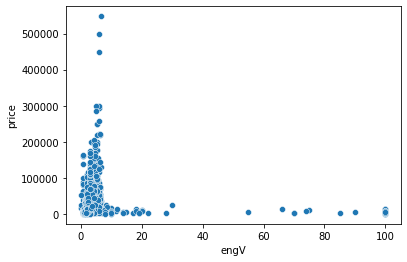

In [61]:
sns.scatterplot(data=df,x="engV",y="price")
plt.show()

## Insights
1.If the volume of engine is high then the price of car is also high

## 4.6 Which Engine Type of cars users preferred maximum?

C:\Users\admin\AppData\Local\Temp/ipykernel_16692/1761175138.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="engType",palette={"r","g","b","black"})


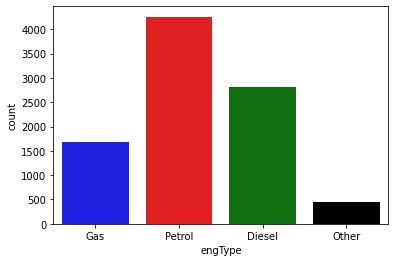

In [62]:
sns.countplot(data=df,x="engType",palette={"r","g","b","black"})
plt.show()

## Insights
1. Petrol Engine Type of cars users preferred maximum after that diesel engine cars preferred

## 4.7 Establish corelation between all features using heatmap?

In [63]:
num_col = []
for i in df.columns:
    if df[i].dtypes != "object":
        num_col.append(i)
print(num_col)

['price', 'mileage', 'engV', 'year']


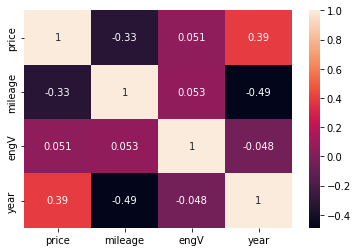

In [64]:
sns.heatmap(df[num_col].corr(),annot=True)
plt.show()

In [65]:
# sns.heatmap(df[df2.columns].corr(),annot=True)
# plt.show()

## 4.8 Distribution of Price?

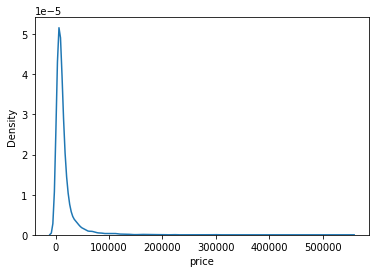

In [66]:
sns.kdeplot(data=df,x="price")
plt.show()

In [67]:
# sns.histplot(data=df,x="price")
# plt.show()

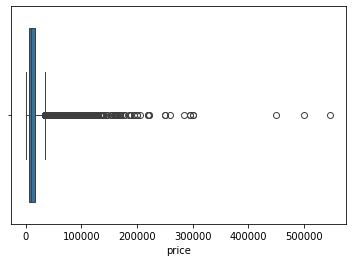

In [68]:
sns.boxplot(data=df,x="price")
plt.show()